In [6]:
import pandas as pd
import os

file_path = '../data/complaints.csv'
if os.path.exists(file_path):
	df = pd.read_csv(file_path)
	df.head()
else:
	print(f"File not found: {file_path}")


C:\Users\try\AppData\Local\Temp\ipykernel_12640\3787151689.py:6: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


 Basic Summary Stats

In [7]:
df.info()
df.describe(include='all')
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9609797 entries, 0 to 9609796
Data columns (total 18 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   Date received                 object
 1   Product                       object
 2   Sub-product                   object
 3   Issue                         object
 4   Sub-issue                     object
 5   Consumer complaint narrative  object
 6   Company public response       object
 7   Company                       object
 8   State                         object
 9   ZIP code                      object
 10  Tags                          object
 11  Consumer consent provided?    object
 12  Submitted via                 object
 13  Date sent to company          object
 14  Company response to consumer  object
 15  Timely response?              object
 16  Consumer disputed?            object
 17  Complaint ID                  int64 
dtypes: int64(1), object(17)
memory usage: 1.3+

Date received                         0
Product                               0
Sub-product                      235295
Issue                                 6
Sub-issue                        839522
Consumer complaint narrative    6629041
Company public response         4770207
Company                               0
State                             54516
ZIP code                          30228
Tags                            8981029
Consumer consent provided?      1649561
Submitted via                         0
Date sent to company                  0
Company response to consumer         20
Timely response?                      0
Consumer disputed?              8841498
Complaint ID                          0
dtype: int64

 Number of Complaints with and without Narratives

In [9]:
with_narrative = df['Consumer complaint narrative'].notna().sum()
without_narrative = df['Consumer complaint narrative'].isna().sum()

print(f"With Narrative: {with_narrative}, Without: {without_narrative}")


With Narrative: 2980756, Without: 6629041


Distribution of Complaints by Product

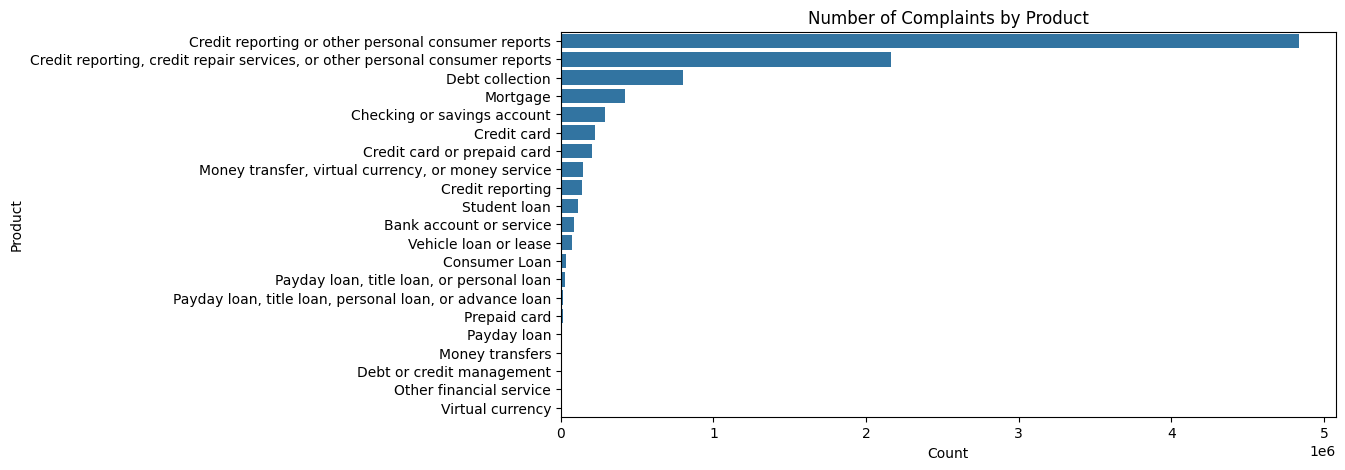

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.countplot(data=df, y='Product', order=df['Product'].value_counts().index)
plt.title("Number of Complaints by Product")
plt.xlabel("Count")
plt.ylabel("Product")
plt.show()


Text Length Analysis

Word Count

In [13]:
df['narrative_length'] = df['Consumer complaint narrative'].dropna().apply(lambda x: len(str(x).split()))


Visualize Narrative Lengths

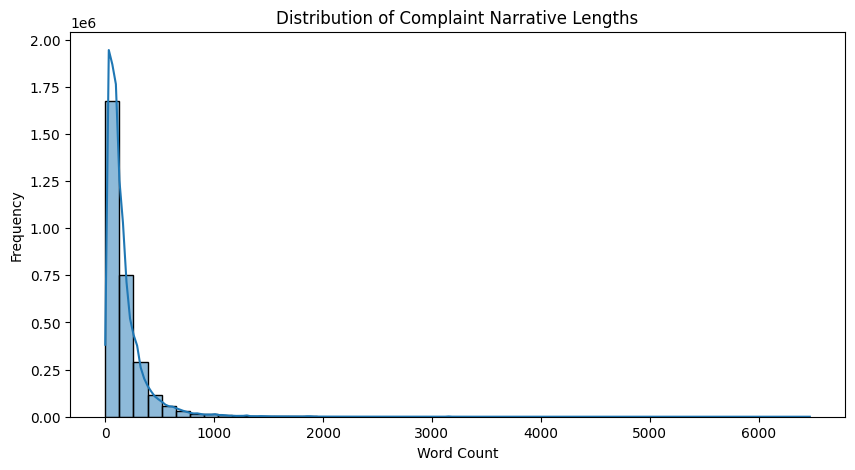

In [14]:
plt.figure(figsize=(10, 5))
sns.histplot(df['narrative_length'].dropna(), bins=50, kde=True)
plt.title("Distribution of Complaint Narrative Lengths")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()


 Filtering Data for RAG

Keep Only Relevant Products

In [16]:
target_products = [
    'Credit card', 'Personal loan', 'Buy Now, Pay Later',
    'Savings account', 'Money transfer, virtual currency, or money service'
]

df_filtered = df[
    df['Product'].isin(target_products) &
    df['Consumer complaint narrative'].notna()
]


Clean the Narratives

Basic Text Cleaning

In [18]:
import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df_filtered['cleaned_narrative'] = df_filtered['Consumer complaint narrative'].apply(clean_text)


C:\Users\try\AppData\Local\Temp\ipykernel_12640\2802920504.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['cleaned_narrative'] = df_filtered['Consumer complaint narrative'].apply(clean_text)


 Save the Cleaned Dataset

In [20]:
df_filtered.to_csv('../data/filtered_complaints.csv', index=False)
